In [1]:
"""Colab-specific patches for functions."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__all__ = ['cv2_imshow', 'cv_imshow']

import cv2
from IPython import display
from PIL import Image


def cv2_imshow(a):
    """A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
    a : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
      (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
      image.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(Image.fromarray(a))



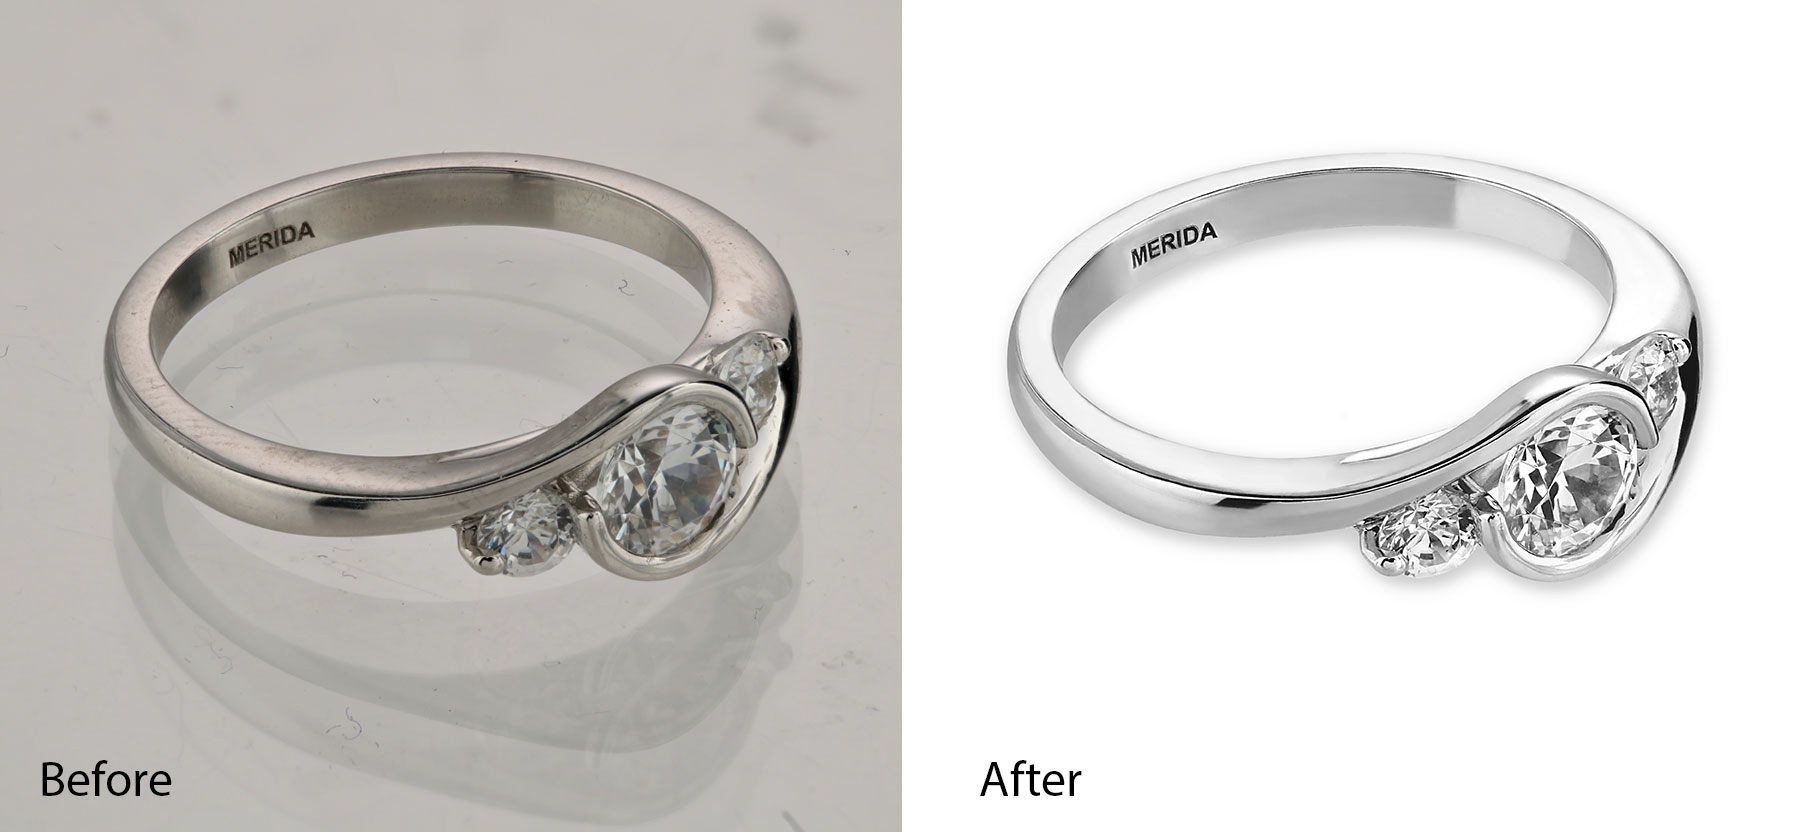

In [2]:
import cv2

img = cv2.imread("../images/banner001.jpg")
cv2_imshow(img)


In [6]:
height,width=img.shape[:2]
img.shape

(832, 1800, 3)

0 832
0 900


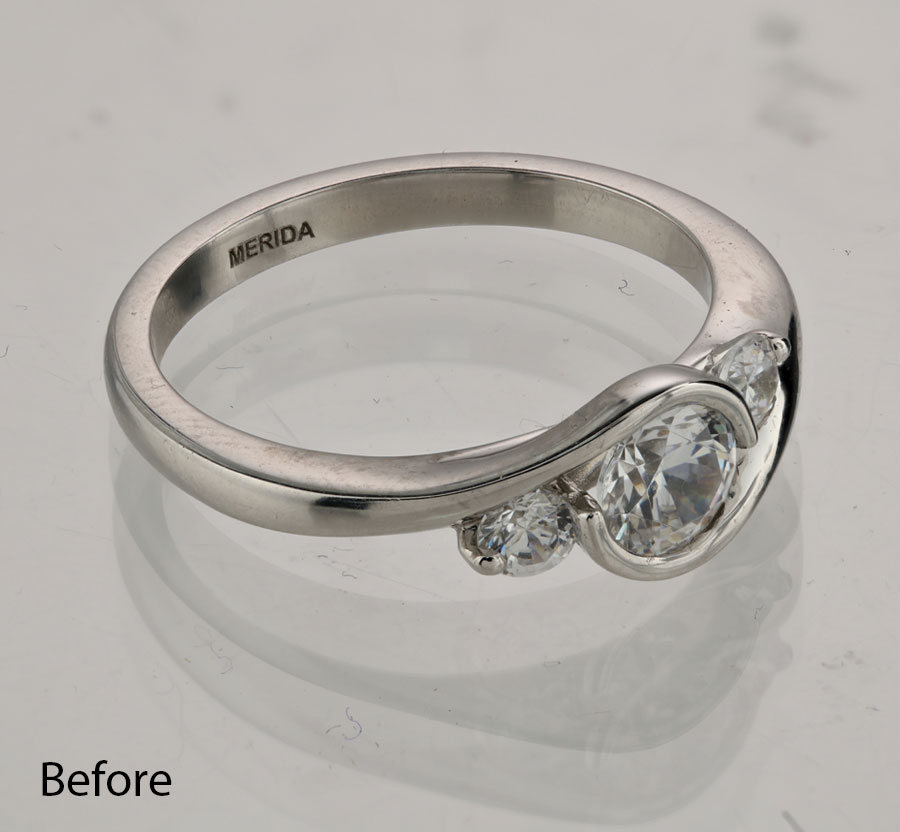

0 832
900 1800


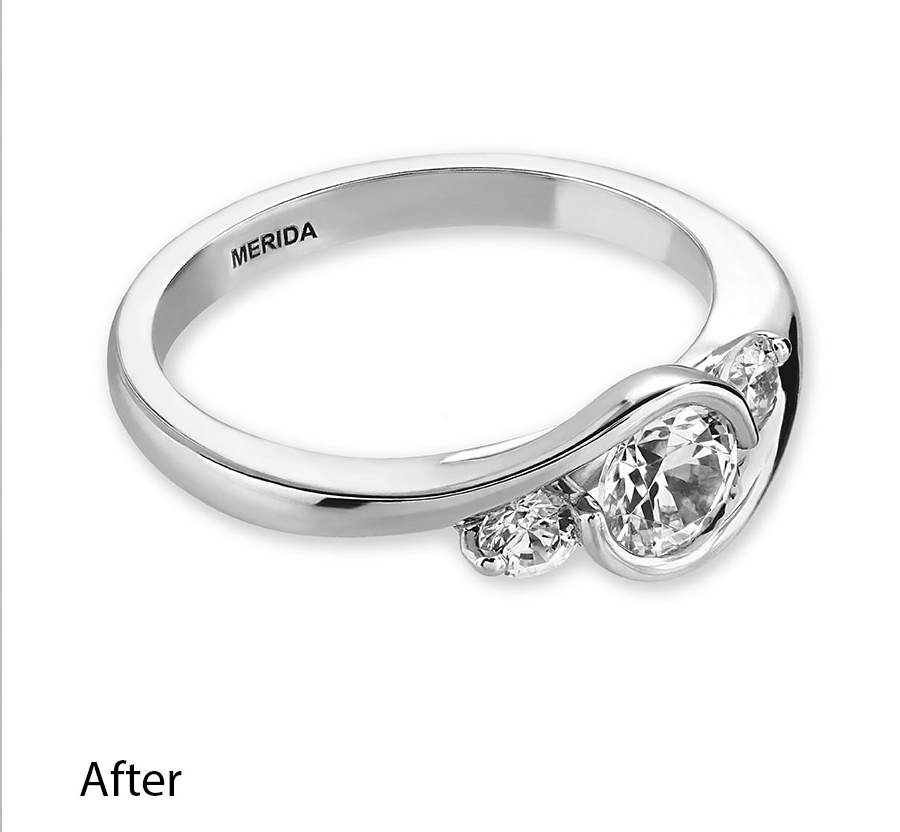

In [9]:
# Let's get the starting pixel coordiantes (top left of cropped top)
start_row, start_col = int(0), int(0)
# Let's get the ending pixel coordinates (bottom right of cropped top)
end_row, end_col = int(height), int(width* .5)
cropped_left = img[start_row:end_row , start_col:end_col]
print (start_row, end_row) 
print (start_col, end_col)

cv2_imshow(cropped_left)

# Let's get the starting pixel coordiantes (top left of cropped bottom)
start_row, start_col = int(0), int(width* .5)
# Let's get the ending pixel coordinates (bottom right of cropped bottom)
end_row, end_col = int(height), int(width)
cropped_right = img[start_row:end_row , start_col:end_col]
print (start_row, end_row )
print (start_col, end_col)

cv2_imshow(cropped_right)

In [5]:
height,width

(array([[182, 187, 190],
        [182, 187, 190],
        [182, 187, 190],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]], dtype=uint8), array([[182, 187, 190],
        [182, 187, 190],
        [182, 187, 190],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]], dtype=uint8))

In [ ]:
cropped_top.size
cropped_bot.size

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.autograd import Variable
# resnet152 = models.resnet152(pretrained=True)
# modules=list(resnet152.children())[:-1]
# resnet152=nn.Sequential(*modules)
# for p in resnet152.parameters():
#     p.requires_grad = False